In [ ]:
from mascon_cube.trajectory import simulate_trajectory, ASTEROIDS_DATABASE, GRAVITATIONAL_CONSTANT
from mascon_cube.visualization import plot_trajectory
from mascon_cube.metrics import fde, ade
from matplotlib import pyplot as plt
import torch
from mascon_cube.data.mascon_model import MasconModel
import numpy as np

In [2]:
asteroid = "eros"

In [3]:
cube = torch.load(f"/home/pietrofanti/code/masconCube/data/output/mascon_cube/{asteroid}/model.pt", weights_only=False)

In [4]:
cube.masses

tensor([[6.9878e-05],
        [6.5367e-05],
        [6.0606e-05],
        ...,
        [1.0377e-05],
        [6.6109e-06],
        [4.4718e-06]], device='cuda:0', grad_fn=<DivBackward0>)

In [5]:
traj, rotated_traj = simulate_trajectory(
    asteroid_name=asteroid,
    mascon_points=cube.coords.detach().cpu().numpy(),
    mascon_masses=cube.masses.detach().cpu().numpy().squeeze(),
)


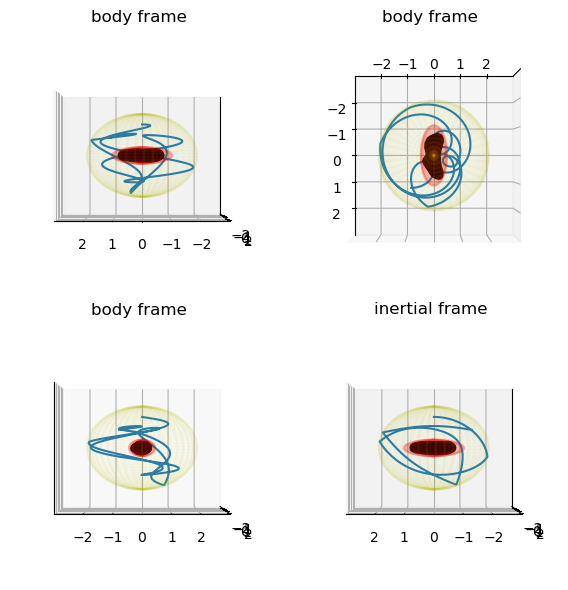

In [6]:
fig = plot_trajectory(
    traj,
    rotated_traj,
    mascon_points=cube.coords.detach().cpu().numpy(),
)
plt.show()
    

In [7]:
gt = MasconModel(asteroid, device="cpu")

In [8]:
traj_gt, rotated_traj_gt = simulate_trajectory(
    asteroid_name=asteroid,
    mascon_points=gt.coords.detach().cpu().numpy(),
    mascon_masses=gt.masses.detach().cpu().numpy().squeeze(),
)


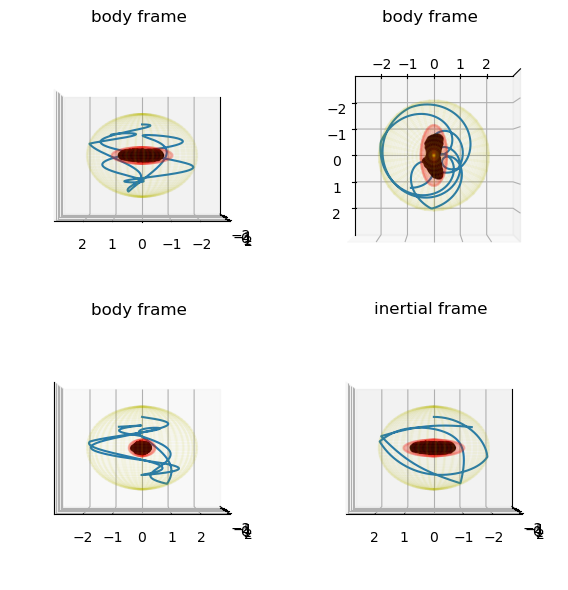

In [9]:
fig = plot_trajectory(
    traj_gt,
    rotated_traj_gt,
    mascon_points=gt.coords.detach().cpu().numpy(),
)
plt.show()

In [10]:
def get_radius(traj, unit_L):
    return np.sqrt(traj[:, 0]**2 + traj[:, 1]**2 + traj[:, 2]**2) * unit_L

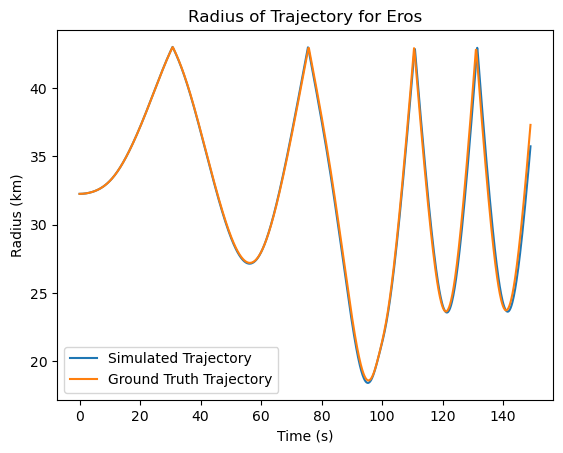

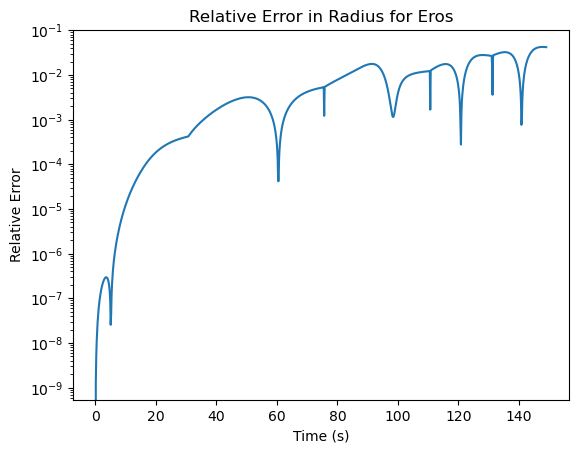

In [11]:
unit_L = ASTEROIDS_DATABASE[asteroid]["diameter"] / 1.6 / 1000
mass = ASTEROIDS_DATABASE[asteroid]["M"]
unit_time = np.sqrt(unit_L**3 / GRAVITATIONAL_CONSTANT / mass)
timesteps = np.arange(0, traj.shape[0]) * unit_time
plt.plot(timesteps, get_radius(traj, unit_L), label="Simulated Trajectory")
plt.plot(timesteps, get_radius(traj_gt, unit_L), label="Ground Truth Trajectory")
plt.xlabel("Time (s)")
plt.ylabel("Radius (km)")
plt.title(f"Radius of Trajectory for {asteroid.capitalize()}")
plt.legend()
plt.show()

rel_error = np.abs(get_radius(traj, unit_L) - get_radius(traj_gt, unit_L)) / get_radius(traj_gt, unit_L)
plt.semilogy(timesteps, rel_error, label="Relative Error")
plt.xlabel("Time (s)")
plt.ylabel("Relative Error")
plt.title(f"Relative Error in Radius for {asteroid.capitalize()}")
plt.show()

In [12]:
unit_time

0.14919070601246062